In [1]:
#Authored by Nathan Tesfayi

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kendalltau

import numpy as np

df_timeseries=pd.read_csv('cbp_jamesnearRRC_1984topresent_chla.csv')
df_chla=pd.read_csv('CHLA.csv')

print(df_timeseries)

      EventId Station  SampleDate SampleTime  Depth SampleType   
0       22887   TF5.6  1994-01-26   11:35:00      1          D  \
1       22286   TF5.6  1993-11-17   11:35:00      1          D   
2       22401   TF5.6  1993-12-02   11:25:00      1          D   
3       21355   TF5.6  1993-09-02   12:25:00      1          D   
4       21584   TF5.6  1993-09-20   11:55:00      1          D   
...       ...     ...         ...        ...    ...        ...   
2124    88683   LE5.1  1988-10-26   00:01:00      1          D   
2125    88807   LE5.1  1988-11-14   00:01:00      1          D   
2126    89642  TF5.5A  1989-02-08   00:01:00      1          D   
2127    90310   LE5.1  1989-03-28   00:01:00      1          D   
2128   429522  RET5.2  2017-02-01   11:00:00      1          D   

     SampleReplicateType Parameter Qualifier  MeasureValue  Unit Method   
0                     S1      CHLA         <          1.00  UG/L    L01  \
1                     S1      CHLA       NaN         12.1

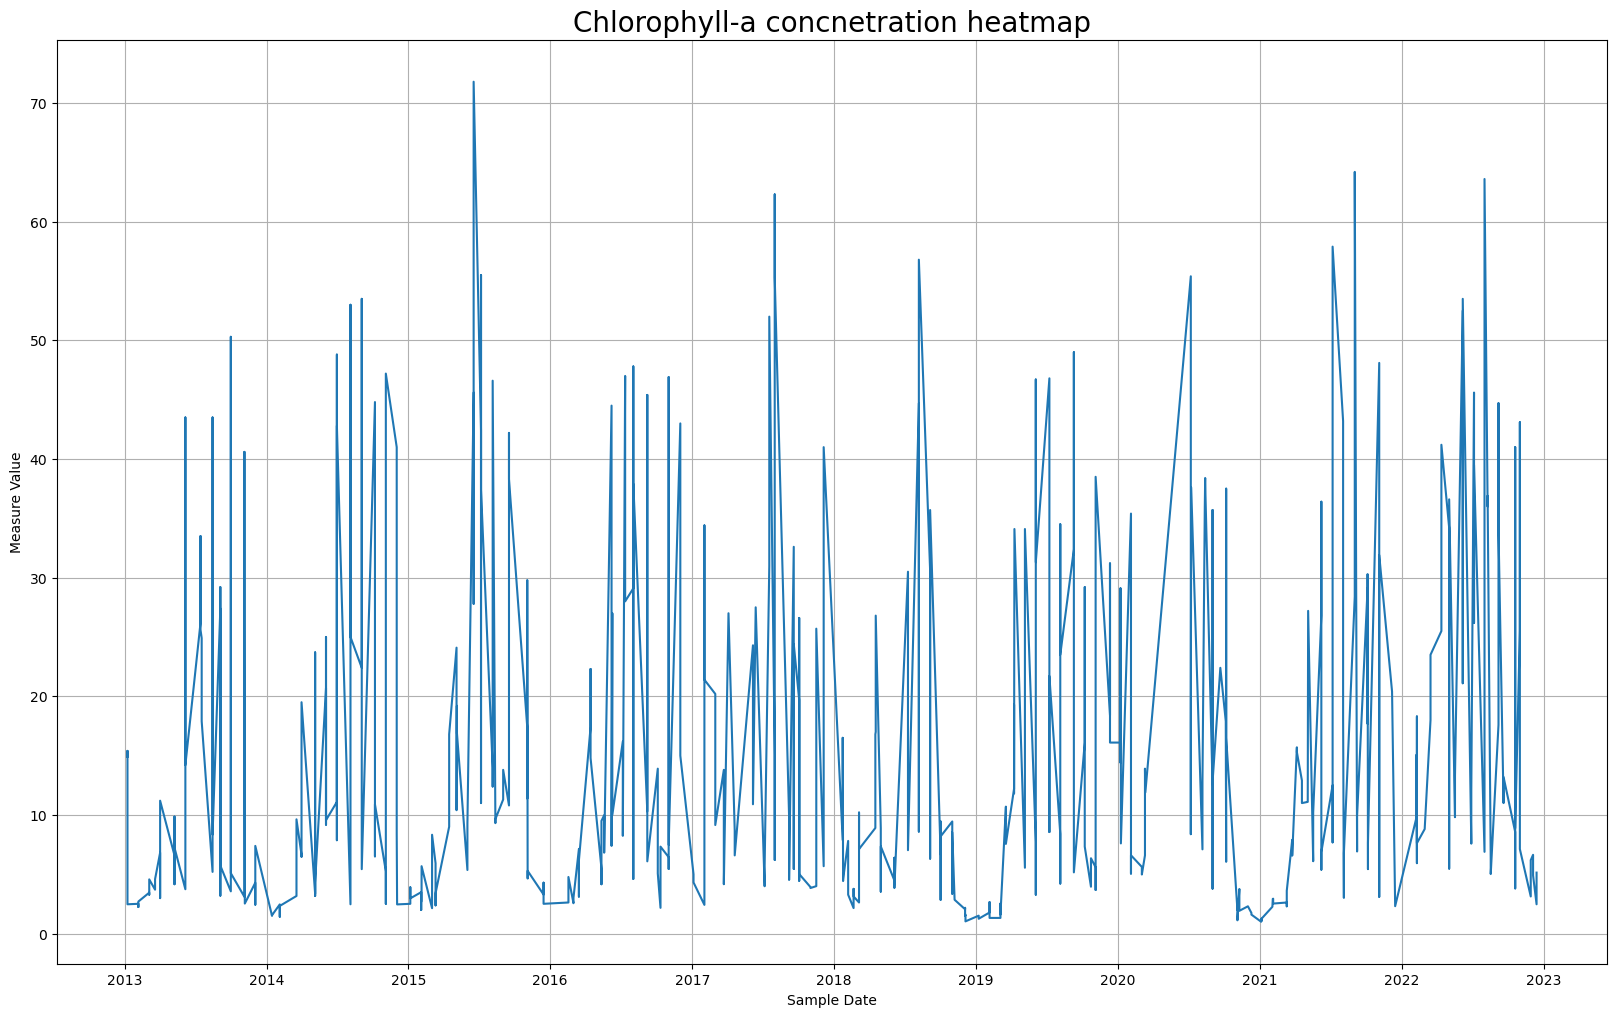

In [2]:
# Convert 'SampleDate' to datetime
df_timeseries['SampleDate'] = pd.to_datetime(df_timeseries['SampleDate'])

# Sort DataFrame based on 'SampleDate'
df_timeseries.sort_values('SampleDate', inplace=True)
# Filter dates for after 2013
df_timeseries = df_timeseries[df_timeseries['SampleDate'] > '2013-01-01']

# Plotting
plt.figure(figsize=(20,12))
plt.plot(df_timeseries['SampleDate'], df_timeseries['MeasureValue'])
plt.title('Chlorophyll-a concnetration heatmap', fontsize=20)
plt.xlabel('Sample Date')
plt.ylabel('Measure Value')
plt.grid(True)
plt.show()

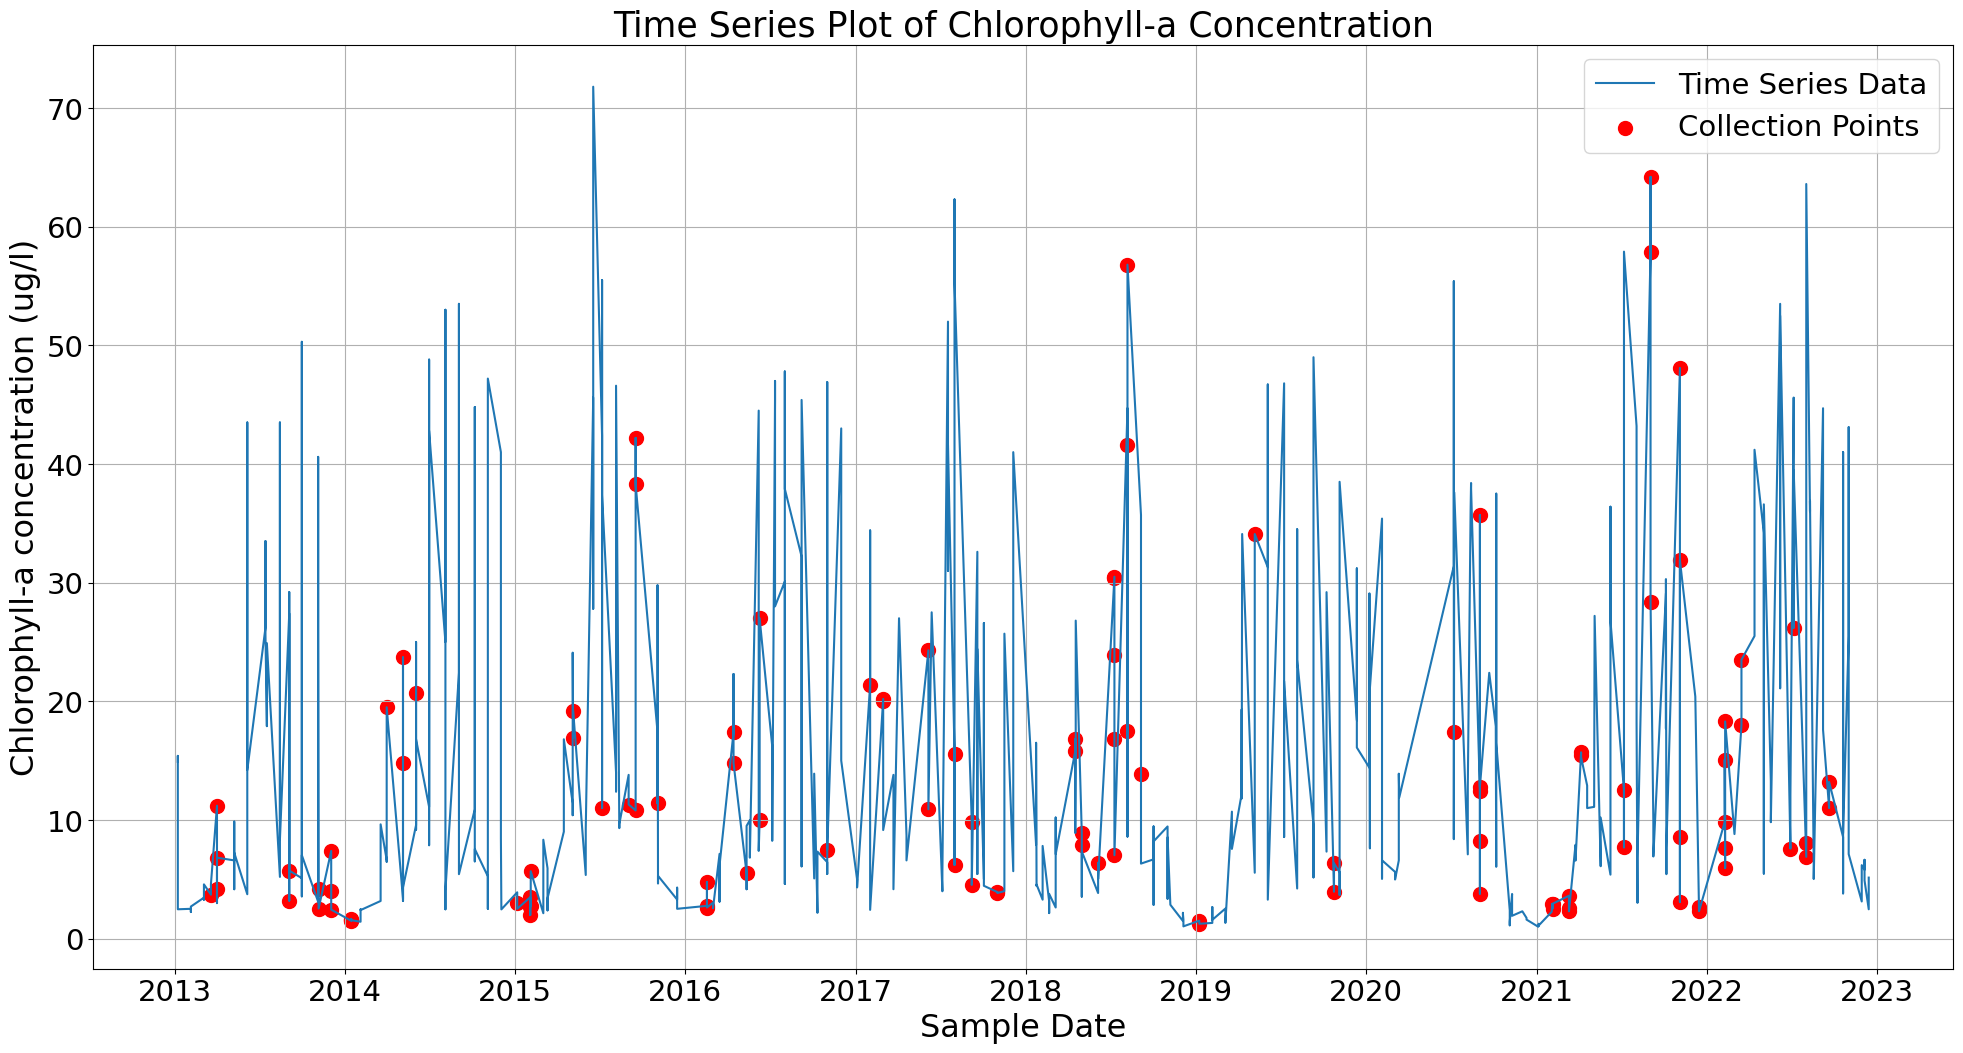

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'SampleDate' to datetime
df_timeseries['SampleDate'] = pd.to_datetime(df_timeseries['SampleDate'])

# Sort DataFrame based on 'SampleDate'
df_timeseries.sort_values('SampleDate', inplace=True)
# Filter dates for after 2013
df_timeseries = df_timeseries[df_timeseries['SampleDate'] > '2013-01-01']

# Plotting
plt.figure(figsize=(24, 12))
plt.plot(df_timeseries['SampleDate'], df_timeseries['MeasureValue'], label='Time Series Data', linewidth=1.5)
plt.scatter(pd.to_datetime(df_chla['SampleDate']), df_chla['MeasureValue'], color='red', label='Collection Points', s=100)
plt.title('Time Series Plot of Chlorophyll-a Concentration', fontsize=25)
plt.xlabel('Sample Date', fontsize=23)
plt.ylabel('Chlorophyll-a concentration (ug/l)', fontsize=23)
plt.grid(True)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(fontsize=21)
plt.show()


In [4]:
# Convert 'sample date' to datetime and set it as index
df_timeseries = df_timeseries.copy()
df_timeseries['SampleDate'] = pd.to_datetime(df_timeseries['SampleDate'])
df_timeseries.set_index('SampleDate', inplace=True)

# Calculate the monthly average of 'measure value'
average_per_month = df_timeseries.resample('M')['MeasureValue'].mean()

# Group the data by the month and calculate the mean for each month
average_per_month = df_timeseries.groupby(df_timeseries.index.month)['MeasureValue'].mean()

# Change the index to month names for clarity
average_per_month.index = pd.date_range('2000-01-01', periods=12, freq='MS').month_name()

average_per_month

January       6.900909
February      6.877694
March         6.978889
April        15.916111
May          12.372143
June         20.586744
July         27.678980
August       24.210185
September    21.235200
October      14.930870
November     14.345091
December     10.060000
Name: MeasureValue, dtype: float64

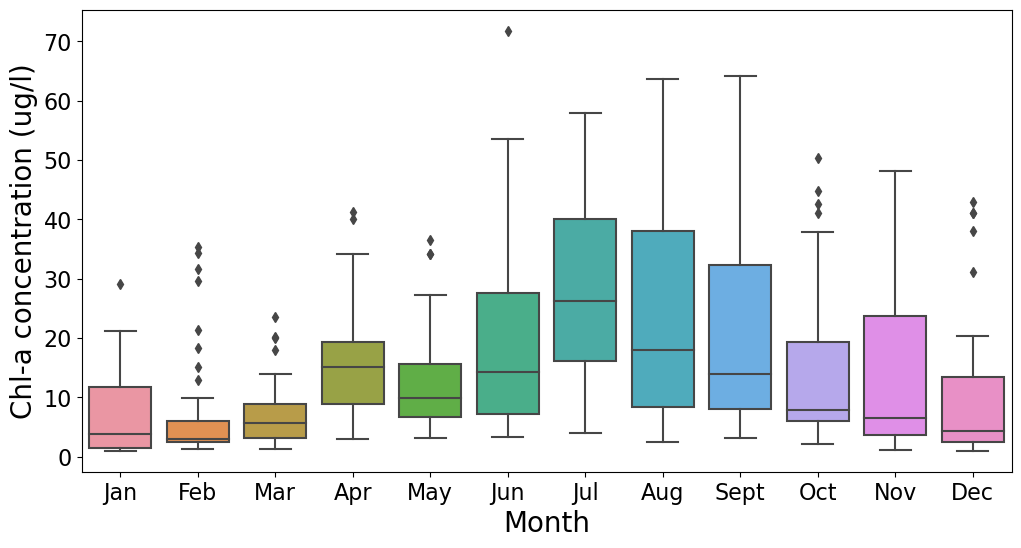

In [5]:
import seaborn as sns

# Create a new column to hold the month of each date
df_timeseries['Month'] = df_timeseries.index.month

# Sort the dataframe by date to ensure the boxes are in chronological order
df_timeseries.sort_values(by=['Month'], inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_timeseries, x='Month', y='MeasureValue')

#plt.title('Box and Whisker Plot by Month', fontsize=22)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Chl-a concentration (ug/l)', fontsize=20)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=16)
plt.yticks(fontsize=16)
plt.show()

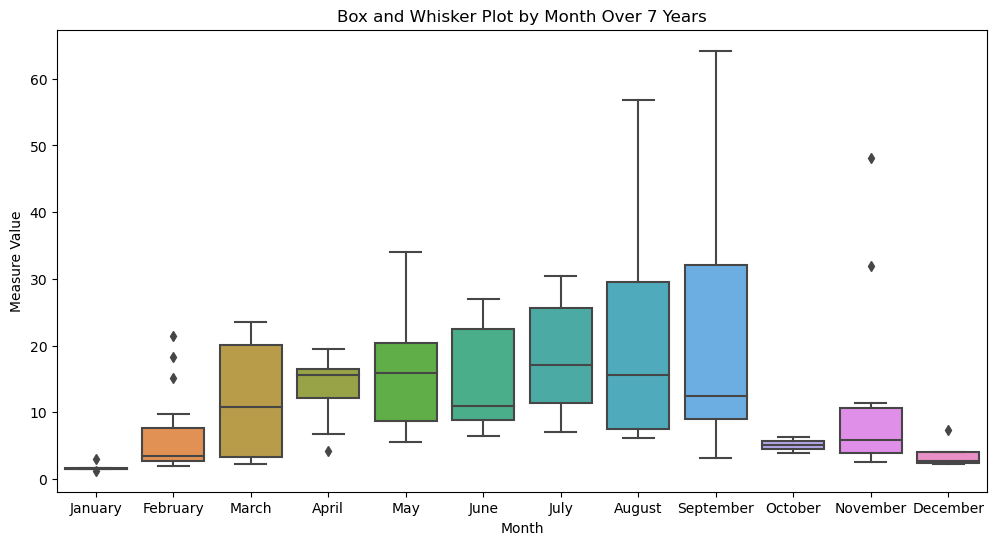

In [6]:
import pandas as pd

# Convert 'SampleDate' to datetime
df_chla['SampleDate'] = pd.to_datetime(df_chla['SampleDate'])

# Set 'SampleDate' as the index
df_chla.set_index('SampleDate', inplace=True)

# Create a new column to hold the month of each date
df_chla['Month'] = df_chla.index.month

# Sort the dataframe by date to ensure the boxes are in chronological order
df_chla.sort_values(by=['Month'], inplace=True)

# Sort the dataframe by date to ensure the boxes are in chronological order
df_chla.sort_values(by=['Month'], inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_chla, x='Month', y='MeasureValue')

plt.title('Box and Whisker Plot by Month Over 7 Years')
plt.xlabel('Month')
plt.ylabel('Measure Value')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                    'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

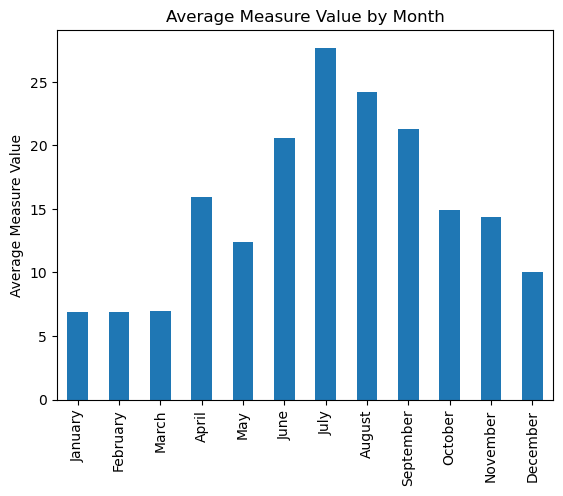

In [7]:
import matplotlib.pyplot as plt

average_per_month.plot(kind='bar')
plt.ylabel('Average Measure Value')
plt.title('Average Measure Value by Month')
plt.show()

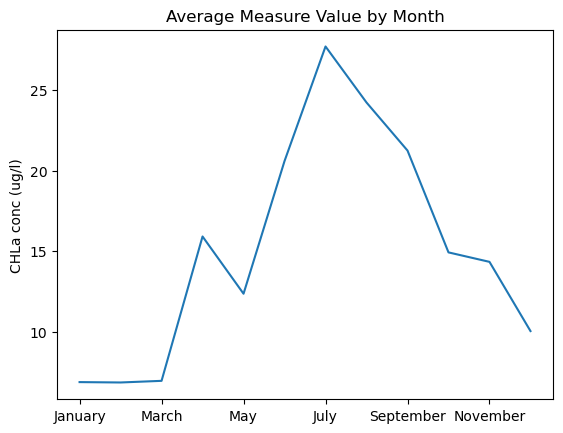

In [8]:
import matplotlib.pyplot as plt

average_per_month.plot(kind='line')
plt.ylabel('CHLa conc (ug/l)')
plt.title('Average Measure Value by Month')
plt.show()

In [9]:
# Now, we calculate the anomaly by subtracting the climatology from the actual values
# We'll need to match up the months in the original data with the months in the climatology
df_timeseries['Anomaly'] = df_timeseries.apply(lambda row: row['MeasureValue'] - average_per_month[row.name.month - 1], axis=1)

print(df_timeseries)

            EventId Station SampleTime  Depth SampleType SampleReplicateType   
SampleDate                                                                     
2013-01-08    46018   LE5.1   10:15:00      1          D                  S1  \
2020-01-08   462066  TF5.5A   11:20:00      1          D                  S1   
2020-01-08   462063   TF5.5   11:55:00      1          D                  S1   
2020-01-08   462069   TF5.6   10:48:00      1          D                  S1   
2015-01-06   395379   TF5.6   11:30:00      1          D                  S1   
...             ...     ...        ...    ...        ...                 ...   
2015-12-15   415074   TF5.5   12:35:00      1          D                  S1   
2014-12-03   394925   LE5.1   10:00:00      1          D                 FS1   
2014-12-03   394925   LE5.1   10:00:00      1          D                 FS2   
2014-12-02   395010   TF5.6   11:45:00      1          D                  S1   
2022-12-14   622106  RET5.2   09:00:00  

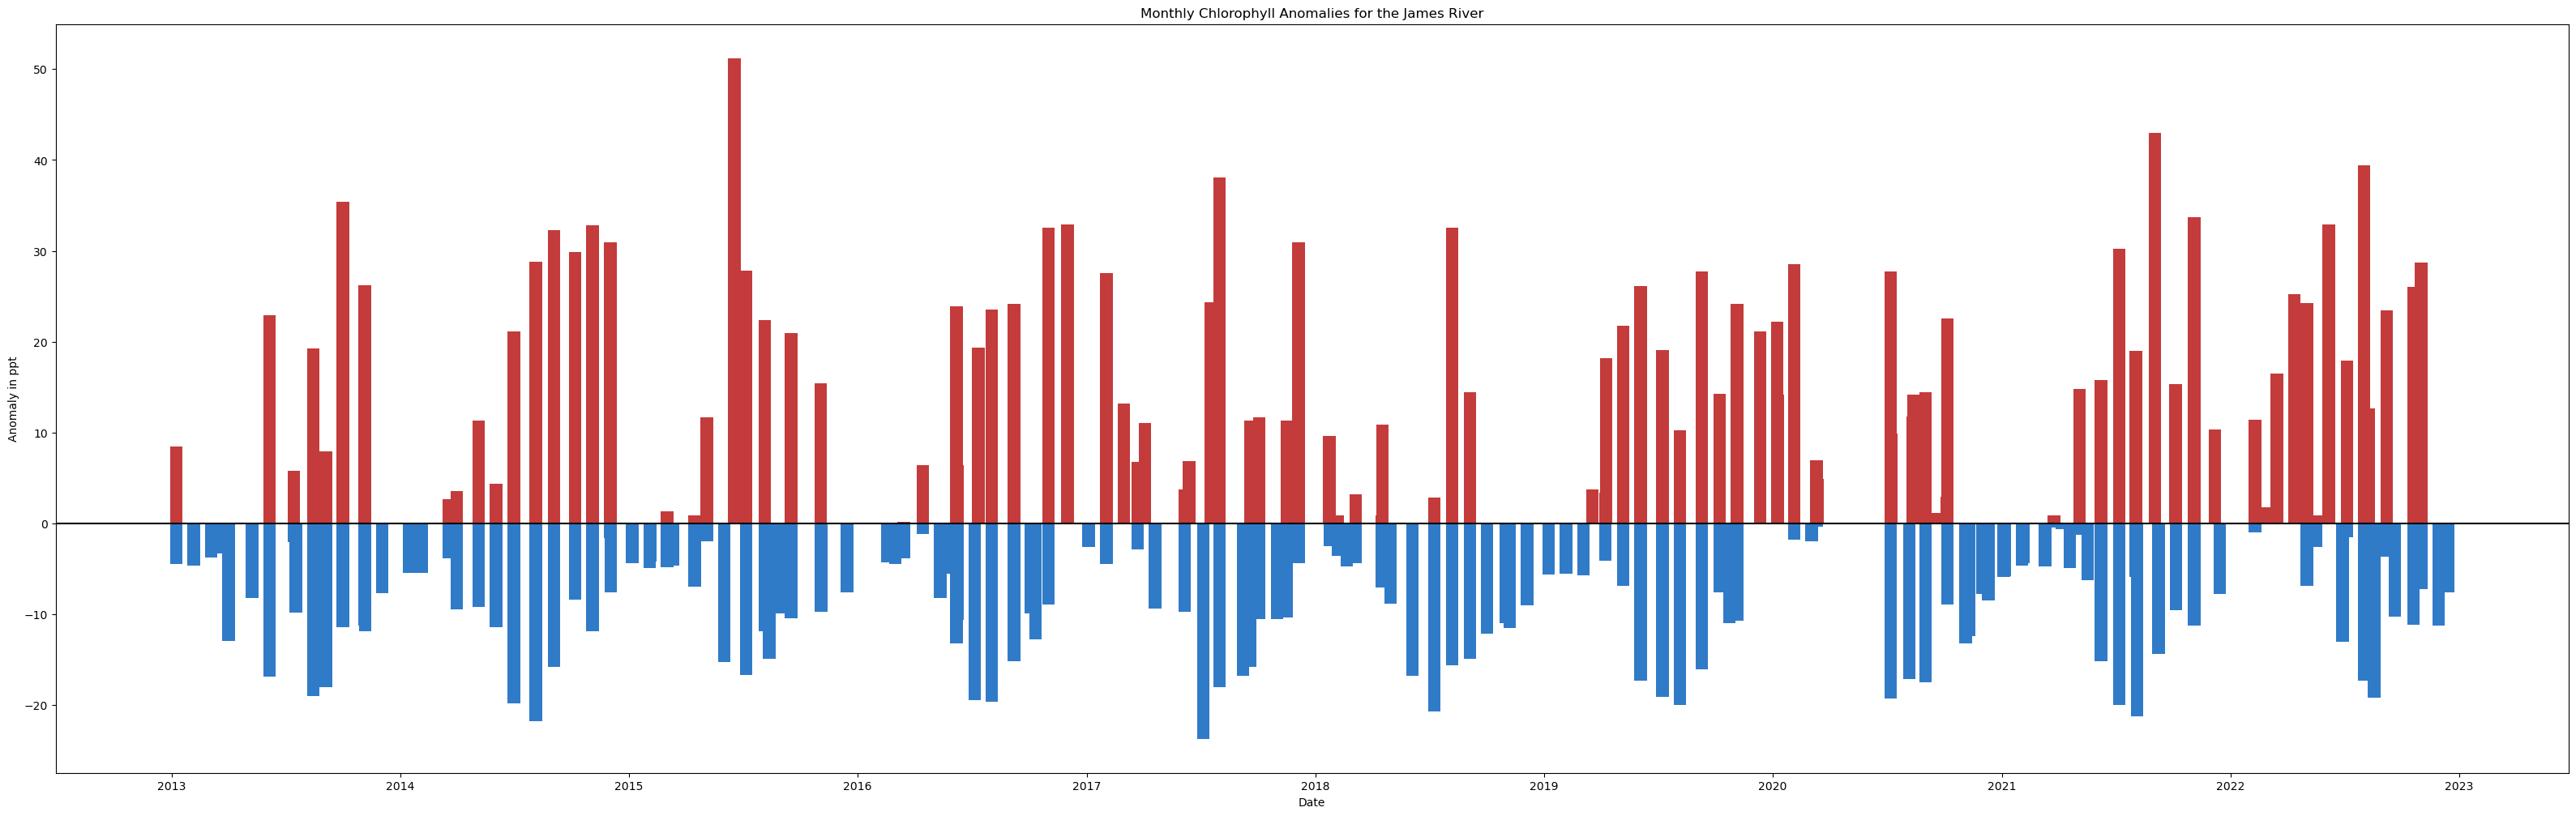

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Define colors for the bars
bar_color = df_timeseries['Anomaly'].apply(lambda x: '#C43B3B' if x > 0 else '#307BC8')

# Create a new figure with a defined size
fig, ax = plt.subplots(figsize=(40, 12))

# Plot the anomalies as a bar plot
ax.bar(df_timeseries.index, df_timeseries['Anomaly'], color=bar_color, width=20)

# Set title and labels
ax.set_title('Monthly Chlorophyll Anomalies for the James River')
ax.set_xlabel('Date')
ax.set_ylabel('Anomaly in ppt')

# Set major ticks location every year
ax.xaxis.set_major_locator(mdates.YearLocator())

# Format x-tick labels as 3-letter month name and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Draw a horizontal line at y=0
ax.axhline(0, color='k')

# Show the plot
plt.show()

In [11]:
average_salinity_june =3.052391

# Compute the salinity anomalies in the ground data
df_ground['Salinity_Anomaly'] = df_ground['Salinity(psu)'] - average_salinity_june

print(df_ground)


NameError: name 'df_ground' is not defined

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV files
df = pd.read_csv('/efs/sarp/data/group_workspaces/S.U.R.F/LE5.1_1984_Present.csv')
df_monthly = pd.read_csv('/efs/sarp/data/group_workspaces/S.U.R.F/monthly.csv')

# Convert SampleDate to datetime format and extract year and month
df['SampleDate'] = pd.to_datetime(df['SampleDate'])
df['Year'] = df['SampleDate'].dt.year
df['Month'] = df['SampleDate'].dt.month

# Aggregate salinity values by year and month
df_salinity = df.groupby(['Year', 'Month'])['MeasureValue'].mean().reset_index()

# Rename year_nu and month_nu columns in df_monthly to 'Year' and 'Month' respectively for merging
df_monthly.rename(columns={'year_nu': 'Year', 'month_nu': 'Month'}, inplace=True)

# Merge the two dataframes on Year and Month
df_merged = pd.merge(df_salinity, df_monthly, on=['Year', 'Month'], how='inner')

# Define the predictor variable (discharge) and the outcome variable (salinity)
X = df_merged[['mean_va']]
y = df_merged['MeasureValue']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error and the R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"MSE: {mse}, RMSE: {np.sqrt(mse)}, R2: {r2}")

# Create a scatter plot of the actual vs predicted salinity values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Salinity')
plt.xlabel('Discharge (cubic feet per second)')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get a list of unique years in the data
years = df_merged['Year'].unique()

# Initialize an empty dictionary to store the models and performance metrics
models = {}

# For each year, fit a linear regression model and calculate its performance metrics
for year in years:
    # Subset the data for the current year
    df_year = df_merged[df_merged['Year'] == year]
    
    # Define the predictor variable (discharge) and the outcome variable (salinity)
    X = df_year[['mean_va']]
    y = df_year['MeasureValue']

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the entire dataset for the current year
    y_pred = model.predict(X)

    # Calculate the mean squared error and the R-squared value
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store the model and performance metrics in the dictionary
    models[year] = {
        'model': model,
        'mse': mse,
        'rmse': np.sqrt(mse),
        'r2': r2
    }

# Print the performance metrics for each year
for year, data in models.items():
    print(f"Year: {year}, MSE: {data['mse']:.2f}, RMSE: {data['rmse']:.2f}, R2: {data['r2']:.2f}")


In [ ]:


# Preprocess the salinity data
df['SampleDate'] = pd.to_datetime(df['SampleDate'])
df['Year'] = df['SampleDate'].dt.year
df['Month'] = df['SampleDate'].dt.month
df_salinity = df.groupby(['Year', 'Month'])['MeasureValue'].mean().reset_index()

# Preprocess the discharge data
df_monthly.rename(columns={'year_nu': 'Year', 'month_nu': 'Month'}, inplace=True)

# Merge the two dataframes
df_merged = pd.merge(df_salinity, df_monthly, on=['Year', 'Month'], how='inner')

# Define a threshold for what we consider "close" to 1500 ft³/s
discharge_threshold = 100

# Find instances where the discharge was close to 1500 ft³/s
close_discharge = df_merged[(df_merged['mean_va'] > 1500 - discharge_threshold) & 
                            (df_merged['mean_va'] < 1500 + discharge_threshold)]

# Calculate the average and range of salinity for these instances
average_salinity = close_discharge['MeasureValue'].mean()
min_salinity = close_discharge['MeasureValue'].min()
max_salinity = close_discharge['MeasureValue'].max()

print("Average salinity:", average_salinity)
print("Minimum salinity:", min_salinity)
print("Maximum salinity:", max_salinity)

print(close_discharge)

In [ ]:
# Import necessary libraries
from scipy import stats
import numpy as np

# Calculate the mean and standard deviation of the historical data
mean_hist = np.mean(close_discharge['MeasureValue'])
std_hist = np.std(close_discharge['MeasureValue'])

# Calculate the z-score for the recent value
recent_value = 6.9
z_score = (recent_value - mean_hist) / std_hist
print("Z-score:", z_score)

# Calculate the percentile for the recent value
percentile = stats.percentileofscore(close_discharge['MeasureValue'], recent_value)
print("Percentile:", percentile)

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(close_discharge['MeasureValue'], recent_value)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Calculate a 95% confidence interval for the mean of the historical data
conf_int = stats.t.interval(0.95, len(close_discharge['MeasureValue'])-1, loc=mean_hist, scale=stats.sem(close_discharge['MeasureValue']))
print("Confidence interval:", conf_int)
